<h3> 감성분석(Sentiment Analysis) </h3>
<ul>
    <li> 개념 : 입력된 자연어 안의 주관적 의견, 감정 등을 찾아내는 방법 </li>
    <li> 특징 : 긍정/부정 및 긍정/중립/부정, 혹은 숫자로 문장의 호감도를 분류할 수 있음 </li>
</ul>


In [1]:
import numpy as np
import tensorflow as tf

path_to_train_file = tf.keras.utils.get_file("train.txt", "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt")
path_to_test_file = tf.keras.utils.get_file("test.txt", "https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt")

In [2]:
train_text = open(path_to_train_file, "rb").read().decode(encoding="utf-8")
test_text = open(path_to_test_file, "rb").read().decode(encoding="utf-8")

In [3]:
print("Length of text : {} characters".format(len(train_text)))
print("Length of text : {} Characters".format(len(test_text)))
print()
print(train_text[:300])

Length of text : 6937271 characters
Length of text : 2318260 Characters

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [4]:
train_Y = np.array([[int(row.split("\t")[2])] for row in train_text.split("\n")[1:] if row.count('\t')>0])
test_Y = np.array([[int(row.split("\t")[2])] for row in test_text.split('\n')[1:] if row.count('\t')>0])
print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [5]:
import re
def clean_str(string) : 
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)     
    string = re.sub(r"\'s", " \'s", string) 
    string = re.sub(r"\'ve", " \'ve", string) 
    string = re.sub(r"n\'t", " n\'t", string) 
    string = re.sub(r"\'re", " \'re", string) 
    string = re.sub(r"\'d", " \'d", string) 
    string = re.sub(r"\'ll", " \'ll", string) 
    string = re.sub(r",", " , ", string) 
    string = re.sub(r"!", " ! ", string) 
    string = re.sub(r"\(", " \( ", string) 
    string = re.sub(r"\)", " \) ", string) 
    string = re.sub(r"\?", " \? ", string) 
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'", "", string)
    return string.lower()

In [6]:
train_text_X = [row.split("\t")[1] for row in train_text.split('\n')[1:] if row.count('\t')>0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5) :
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


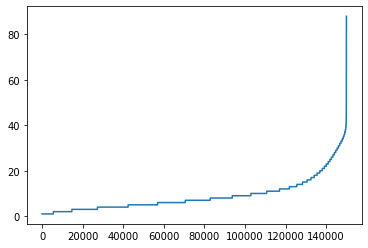

In [7]:
import matplotlib.pyplot as plt
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

In [8]:
sentences_new = list()
for sentence in sentences :
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new
for i in range(5) :
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding="post")
print(train_X[:5])

[[  25  884    8 1111    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [ 588    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [  71  346   31   35    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [ 106    4    2  869  573    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]


In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=25),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(2, activation="softmax")])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 300)           6000000   
                                                                 
 lstm (LSTM)                 (None, 50)                70200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(train_X, train_Y, epochs=10, batch_size=128, validation_split=0.25)

Epoch 1/10
879/879 [==============================] - 40s 43ms/step - loss: 0.4894 - accuracy: 0.7393 - val_loss: 0.4582 - val_accuracy: 0.7665
Epoch 2/10
879/879 [==============================] - 36s 41ms/step - loss: 0.4506 - accuracy: 0.7646 - val_loss: 0.4475 - val_accuracy: 0.7665
Epoch 3/10
879/879 [==============================] - 36s 41ms/step - loss: 0.4384 - accuracy: 0.7689 - val_loss: 0.4508 - val_accuracy: 0.7685
Epoch 4/10
879/879 [==============================] - 36s 41ms/step - loss: 0.4288 - accuracy: 0.7742 - val_loss: 0.4498 - val_accuracy: 0.7593
Epoch 5/10
879/879 [==============================] - 36s 41ms/step - loss: 0.4197 - accuracy: 0.7797 - val_loss: 0.4541 - val_accuracy: 0.7679
Epoch 6/10
879/879 [==============================] - 36s 41ms/step - loss: 0.4105 - accuracy: 0.7843 - val_loss: 0.4570 - val_accuracy: 0.7660
Epoch 7/10
879/879 [==============================] - 36s 41ms/step - loss: 0.4013 - accuracy: 0.7905 - val_loss: 0.4670 - val_accuracy:

In [13]:
from tensorflow.python.client import device_lib
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

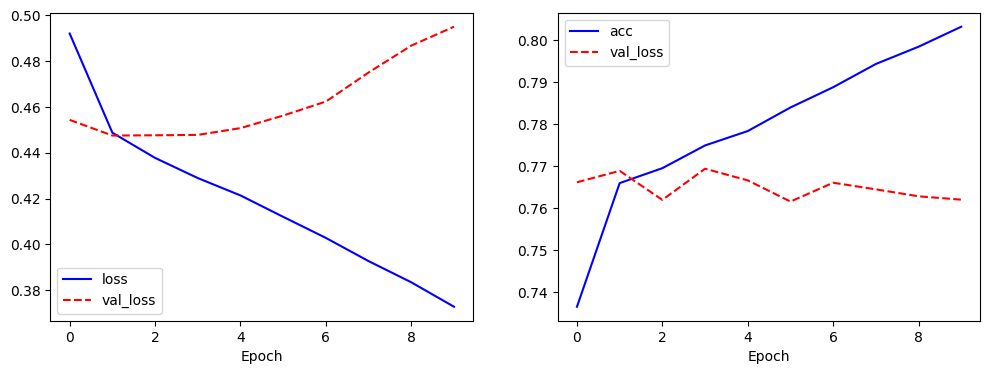

In [40]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], "b-", label="loss")
plt.plot(history.history["val_loss"], "r--", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], "b-", label="acc")
plt.plot(history.history["val_accuracy"], "r--", label="val_acc")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [46]:
test_text_X = [row.split("\t")[1] for row in test_text.split('\n')[1:] if row.count('\t')>0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences = [sentence.split(" ") for sentence in test_text_X]
sentences_new = list()
for sentence in sentences :
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new

test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding="post")
model.evaluate(test_X, test_Y, verbose=0)

[0.5013614892959595, 0.7564200162887573]

In [66]:
test_sentence = "짜증나는 일이 많는데 영화보고 기분이 나빠요"
test_sentence = test_sentence.split(" ")
test_sentences = []
now_sentence = []
for word in test_sentence :
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
    
test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding="post", maxlen=25)
prediction = model.predict(test_X_1)
for index, sentence in enumerate(test_sentences) :
    print(sentence)
    print(prediction[index])

1/1 [==============================] - 0s 14ms/step
['짜증나는']
[0.8942082  0.10579181]
['짜증나는', '일이']
[0.70313156 0.2968684 ]
['짜증나는', '일이', '많는데']
[0.70313156 0.2968684 ]
['짜증나는', '일이', '많는데', '영화보고']
[0.11874932 0.88125074]
['짜증나는', '일이', '많는데', '영화보고', '기분이']
[0.12070893 0.87929106]
['짜증나는', '일이', '많는데', '영화보고', '기분이', '나빠요']
[0.12070893 0.87929106]
